In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [62]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data 

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [63]:
data.shape 

(42, 2)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [65]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [66]:
data[data.duplicated()] 

,Quarter,Sales


data1=pd.concat([data,t],axis=1)
data1

# Visualisations

In [67]:
import warnings
warnings.filterwarnings('ignore') 

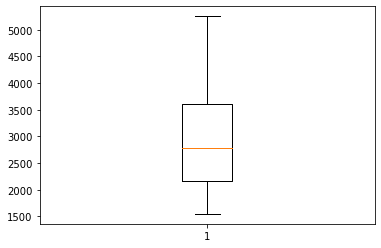

In [68]:
plt.boxplot(data['Sales'])
plt.show()

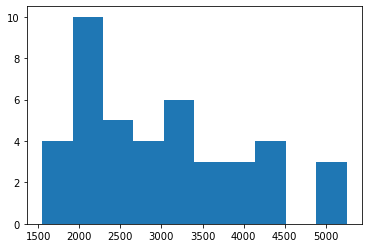

In [69]:
plt.hist(data['Sales'])
plt.show() 

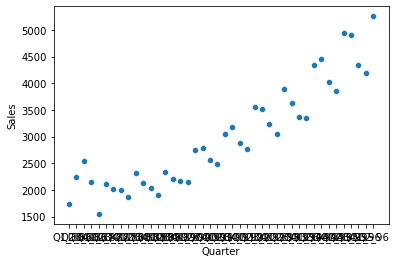

In [70]:
sns.scatterplot(x="Quarter", y="Sales", data=data)
plt.show() 

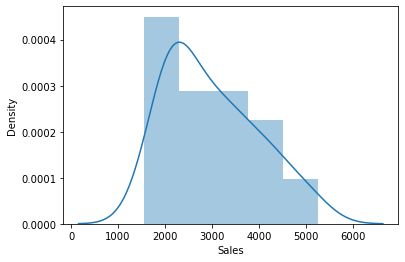

In [71]:
sns.distplot(data['Sales'])
plt.show() 

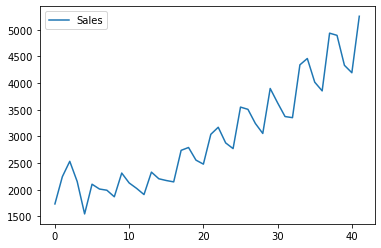

In [72]:
data.plot()
plt.show() 

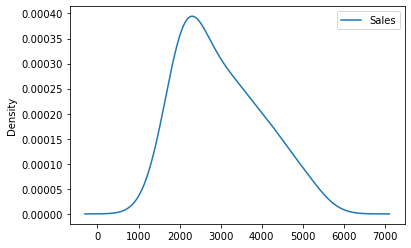

In [73]:
data.plot(kind='kde') 
plt.show() 

# Splitting the data

In [74]:
Train= data.head(36)
Test= data.tail(6)  

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Moving averages

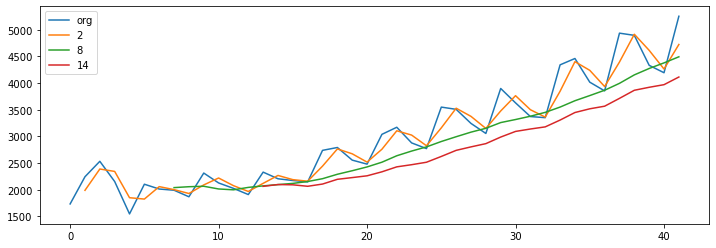

In [76]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,20,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 

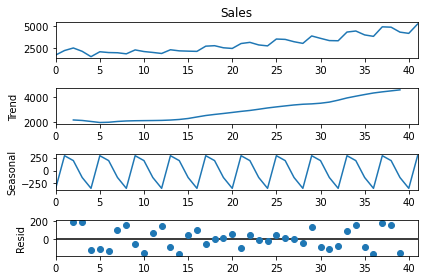

In [77]:
decompose_ts_add = seasonal_decompose(data.Sales,freq=4)
decompose_ts_add.plot()
plt.show() 

In [78]:
def MAPE(pred,org): #MAPE = mean absolute percentage error
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

# Simple Exponential Smoothing

In [79]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

11.318379651390075

# Advanced Exponential Smoothing

## Holt Method

In [80]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

9.777086675249981

### Holts winter exponential smoothing with additive seasonality and additive trend

In [81]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

4.092420795926838

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [82]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

1.8886796613974923

# Final Model by combining train and test

In [83]:
data["Sales"] = data["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 

In [84]:
hwe_model_mul_add.forecast(20) 

42    5216.190079
43    4663.475300
44    4502.472863
45    5731.036391
46    5613.076244
47    5011.683296
48    4832.498764
49    6143.555251
50    6009.962410
51    5359.891292
52    5162.524666
53    6556.074111
54    6406.848575
55    5708.099288
56    5492.550567
57    6968.592971
58    6803.734741
59    6056.307285
60    5822.576468
61    7381.111831
dtype: float64

In [85]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0,parse_dates=True) 
df 

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


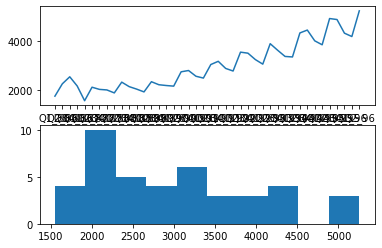

In [86]:
#line plot
plt.subplot(211)
plt.plot(df)
#hist plot
plt.subplot(212)
plt.hist(df)

plt.show() 

## Square Root Transform

In [87]:
from numpy import sqrt 
from pandas import DataFrame 

In [88]:
dataframe = DataFrame(df.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales']) 
dataframe['Sales'] 

0     41.651254
1     47.381019
2     50.336915
3     46.421579
4     39.342331
5     45.873871
6     44.881655
7     44.628993
8     43.232511
9     48.100229
10    46.133719
11    45.020318
12    43.710456
13    48.282139
14    46.973929
15    46.625830
16    46.349520
17    52.338399
18    52.846514
19    50.556997
20    49.809377
21    55.131869
22    56.321541
23    53.656323
24    52.649786
25    59.581876
26    59.228372
27    56.954894
28    55.281100
29    62.441973
30    60.241182
31    58.077534
32    57.896459
33    65.893854
34    66.790718
35    63.379808
36    62.080593
37    70.256672
38    69.964277
39    65.825527
40    64.761099
41    72.477583
Name: Sales, dtype: float64

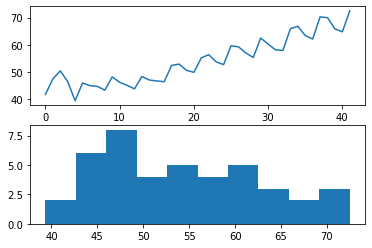

In [89]:
#line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
#hist plot
plt.subplot(212)
plt.hist(dataframe['Sales'])

plt.show() 

## Log Transform

In [90]:
from numpy import log

dataframe2 = DataFrame(df.values)
dataframe2.columns = ['Sales']
dataframe2['Sales'] = log(dataframe2['Sales'])
dataframe2['Sales']  

0     3.729331
1     3.858222
2     3.918739
3     3.837764
4     3.672301
5     3.825896
6     3.804029
7     3.798384
8     3.766593
9     3.873287
10    3.831544
11    3.807114
12    3.777587
13    3.877062
14    3.849593
15    3.842155
16    3.836211
17    3.957730
18    3.967392
19    3.923101
20    3.908203
21    4.009728
22    4.031077
23    3.982599
24    3.963662
25    4.087351
26    4.081401
27    4.042260
28    4.012431
29    4.134238
30    4.098356
31    4.061779
32    4.058656
33    4.188045
34    4.201564
35    4.149145
36    4.128433
37    4.252155
38    4.247985
39    4.187008
40    4.170705
41    4.283277
Name: Sales, dtype: float64

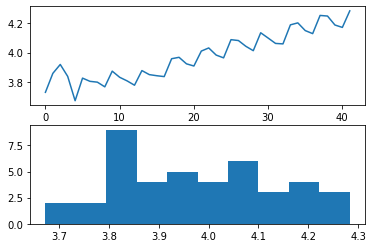

In [91]:
plt.subplot(211)
plt.plot(dataframe2['Sales'])

plt.subplot(212)
plt.hist(dataframe2['Sales'])

plt.show() 

### Lag plot

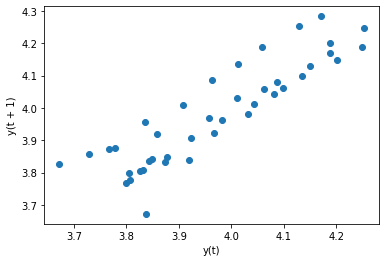

In [92]:
from pandas.plotting import lag_plot

lag_plot(df)
plt.show() 

### ACF plot

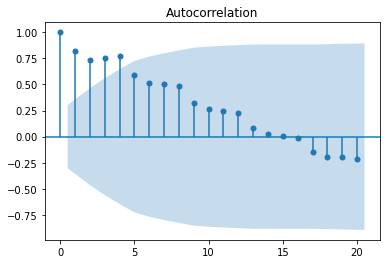

In [93]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df,lags=20) #acf plot for 20 lags
plt.show() 

In [94]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
data['Quarter_Year'] 

0     Q1 1986
1     Q2 1986
2     Q3 1986
3     Q4 1986
4     Q1 1987
5     Q2 1987
6     Q3 1987
7     Q4 1987
8     Q1 1988
9     Q2 1988
10    Q3 1988
11    Q4 1988
12    Q1 1989
13    Q2 1989
14    Q3 1989
15    Q4 1989
16    Q1 1990
17    Q2 1990
18    Q3 1990
19    Q4 1990
20    Q1 1991
21    Q2 1991
22    Q3 1991
23    Q4 1991
24    Q1 1992
25    Q2 1992
26    Q3 1992
27    Q4 1992
28    Q1 1993
29    Q2 1993
30    Q3 1993
31    Q4 1993
32    Q1 1994
33    Q2 1994
34    Q3 1994
35    Q4 1994
36    Q1 1995
37    Q2 1995
38    Q3 1995
39    Q4 1995
40    Q1 1996
41    Q2 1996
Name: Quarter_Year, dtype: object

In [95]:
data 

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [96]:
data['date'] = (
    pd.to_datetime(
        data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True
                  )
               )

In [97]:
data 

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [98]:
data.drop(columns=['Quarter','Quarter_Year'],inplace=True)  
data 

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01
5,2104.411995,1987-04-01
6,2014.362999,1987-07-01
7,1991.746998,1987-10-01
8,1869.049999,1988-01-01
9,2313.631996,1988-04-01


In [99]:
data2 = data[['date','Sales']] 

In [100]:
data2 

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [101]:
data2.set_index('date',inplace=True)  
data2 

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


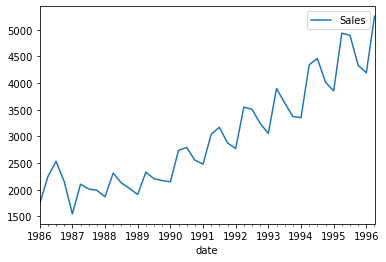

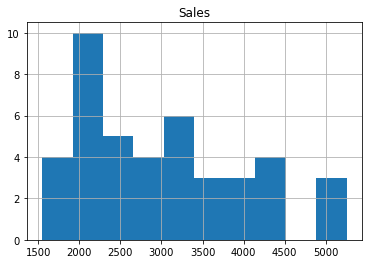

In [103]:
#line plot
data2.plot()
plt.show() 
#hist plot
data2.hist()
plt.show() 

## Upsampling the data

In [104]:
upsampled = data2.resample('M').mean()
print(upsampled.head(32)) 

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


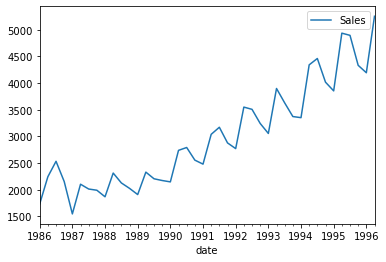

In [105]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(15))
interpolated.plot()
plt.show() 

In [106]:
interpolated 

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000
